# Exploring the Quality of Government Dataset


## Exploring the Quality of Government Dataset

This project explores the 2021 Quality of Government dataset(s) that has been assembled by the QOG institute from University of Gothenburg.
All data as well as documentation can be found here: https://www.qogdata.pol.gu.se/data/

Note that we only consider the data that has been published in January 2021, i.e. the data files that contain the suffix "jan21".

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Optional, Tuple, Dict, Callable

### Analyzing Life Expectancy 

It is widely known that in most countries in Africa, the life expectancy is much lower than in well-developed countries such as Germany. In this first part of the homework, we are looking into this issue.

We are going to investigate differences with respect to continents, and we consider five continents: Africa, Americas, Asia, Europe, Oceania. We use the following reference allocation from countries to continents:  
https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

#### Collecting Life Expectancies

First, I collect the life expectancies (column "wdi_lifexp") of all European and all African countries, and store them in two distinct one-dimensional numpy arrays. More precisely, the life expectancies of the European countries are stored in a variable called ```le_eu```, and the life expectancies of the African countries in a variable called ```le_af```. All NaN-values from the data are removed.

In [3]:
# import basic cs dataset because it is a smaller dataset with all the variables we need and countries from both europe and africa
qog_bas_cs_df = pd.read_csv('qog_bas_cs_jan21.csv')

# sort countries by region
ref_df = pd.read_csv('all.csv')
# change column name for easy access
ref_df = ref_df.rename(columns={'alpha-3':'alpha_3'})
# create lists of countries (3-char code) grouped by region
eu_countries = list(ref_df[ref_df['region'] == 'Europe'].alpha_3) # countries in europe
af_countries = list(ref_df[ref_df['region'] == 'Africa'].alpha_3) # countries in africa

# collect life expectancies for countries on each region
# add wdi_lifexp to array if country code (ccodealp) is in region list
le_eu = qog_bas_cs_df[qog_bas_cs_df['ccodealp'].isin(eu_countries)]['wdi_lifexp']
le_af = qog_bas_cs_df[qog_bas_cs_df['ccodealp'].isin(af_countries)]['wdi_lifexp']
# drop nan values 
le_eu = le_eu.dropna().to_numpy()
le_af = le_af.dropna().to_numpy()

#### b) The Basic Test Statistic

First, I would like to test whether the life expectancy in Africa is significantly lower than in Europe by comparing mean life expectancies per region.

In [4]:
def my_statistic(v1: np.ndarray, v2: np.ndarray) -> float:
    """
    :param v1: numpy array representing life expectancies in Europe (could also be any other data array)
    :param v2: numpy array representing life expectancies in Africa (could also be any other data array)
    :return: resulting value of test statistic, as float
    """
    
    # we chose to take the difference of the mean life expectancies per region 
    avg_v1 = v1.mean() # europe
    avg_v2 = v2.mean() # africa
    diff = avg_v1 - avg_v2 # if diff is a positive value, then v1 has a higher average than v2
    return diff
    
    raise NotImplementedError

#### c) Automating Simulation

A statistical test is conducted on the hypothesis that life expectancy in African countries is significantly lower than in European countries. A function ```my_test``` performs this test by means of a randomized simulation. In that simulation, the life expectancies is randomized between the continents ```num_sim``` times, each time computing the test statistic specified by ```stat_func```, to calculate the corresponding p-value.

In [5]:
def my_test(v1: np.ndarray, v2: np.ndarray, stat_func: Callable[[np.ndarray,np.ndarray],float], num_sim: int) -> float:    
    """
    :param v1: numpy array representing life expectancies in Europe (could also be any other data array)
    :param v2: numpy array representing life expectancies in Africa (could also be any other data array)
    :param stat_func: function that computes a test statistic on the two input vectors (should work with my_statistic)
    :param num_sim: int, number of randomizations
    :return: resulting p-value as float
    """
    
    # calculate reference for comparison 
    mean_diff = stat_func(le_eu, le_af)
    
    # combine life expectancy means from both regions into one array
    col = np.concatenate((v1, v2))
    
    # run num_sim randomized simulations 
    count = 0
    for _ in range(num_sim):
        np.random.shuffle(col)
        diff = stat_func(col[:len(v1)], col[len(v1):])
        if diff > mean_diff: count+=1
    
    p_value = count/num_sim
    return p_value
    
    # raise NotImplementedError

#### d) Running the Test

The function from c) is applied to conduct a statistical test on the hypothesis that life expectancy in African countries is significantly lower than in European countries, using 10,000 randomizations. 
The resulting p-value is saved into a variable called ```p_val``` and interpret its value.

In [6]:
p_val = my_test(le_eu, le_af, my_statistic, 10000)
print('mean diff between eu and af:', my_statistic(le_eu, le_af))
print('p_val:', p_val)

mean diff between eu and af: 15.659063310976379
p_val: 0.0


**Result:** After 10,000 randomizations, we can conclude that there is a significantly lower life expectancy in African countries than in European countries (p < 0.01). When looking at the differences in means after randomized shuffling, it was usually within the range [-5.0, 5.0], far from the difference in means before randomized shuffling (15.66). This means that randomized shuffling of countries to different continents cannot account for the difference in means between life expectancy in Africa and Europe.

#### e) Visualization:
Now I consider the life expectancies over all continents. An informative visualization is created that points out how the life expectancies over all five continents differ.

means: [79.07964859008788, 63.420585279111506, 73.7954879111432, 71.74535217285157, 74.96908569335938]
variances: [12.496257110036677, 36.77696015382107, 22.766996768262686, 33.2227809383627, 12.161397661371726]


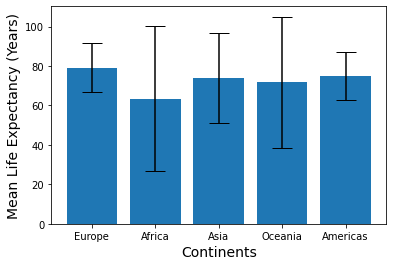

In [7]:
# group countries by region
# create lists of countries (3-char code) grouped by region
as_countries = list(ref_df[ref_df['region'] == 'Asia'].alpha_3) # countries in asia
oc_countries = list(ref_df[ref_df['region'] == 'Oceania'].alpha_3) # countries in oceania
am_countries = list(ref_df[ref_df['region'] == 'Americas'].alpha_3) # countries in americas

# collect life expectancies for countries in each region
# add wdi_lifexp to array if country code (ccodealp) is in region list
le_as = qog_bas_cs_df[qog_bas_cs_df['ccodealp'].isin(as_countries)]['wdi_lifexp']
le_oc = qog_bas_cs_df[qog_bas_cs_df['ccodealp'].isin(oc_countries)]['wdi_lifexp']
le_am = qog_bas_cs_df[qog_bas_cs_df['ccodealp'].isin(am_countries)]['wdi_lifexp']
# drop nan values 
le_as = le_as.dropna().to_numpy()
le_oc = le_oc.dropna().to_numpy()
le_am = le_am.dropna().to_numpy()

# plot mean life expectancies per region along with variances
x_axis = ['Europe','Africa','Asia','Oceania','Americas']
region_means = [le_eu.mean(),le_af.mean(),le_as.mean(),le_oc.mean(),le_am.mean()]
variances = [le_eu.var(),le_af.var(),le_as.var(),le_oc.var(),le_am.var()]
plt.bar(x_axis, region_means)
plt.errorbar(x=x_axis, y=region_means, yerr=variances
            , ecolor='black', fmt='None', capsize=10)
plt.xlabel('Continents', fontsize=14)
plt.ylabel('Mean Life Expectancy (Years)', fontsize=14)
plt.savefig('life_expectancy_plot.png')
print('means:', region_means)
print('variances:', variances)

**Result:** The plot shows life expectancies averaged over countries within each continent/region. The variance in life expectancy means across countries within each region is denoted as an error bar. Europe has the highest mean life expectancy among all the continents while Africa has the lowest life expectancy. Europe and the Americas also have low variance in the life expectancy means across countries within those respective regions, while Africa has the largest variance, closely follwed by Oceania. 

### Investigating Corruption

In this second part, I focus on corruption as measured by the _Political Corruption Index_ (Column vdem_corr). 
The data for factors are explored to investigate correlations with corruption.

vdem_corr        1.000000
ffp_sl           0.808576
ffp_fsi          0.795440
ffp_hr           0.763129
ffp_sec          0.735284
ffp_ps           0.700681
cspf_sfi         0.697327
ffp_ued          0.653336
ffp_ext          0.650161
gpi_gpi          0.645700
gii_gii          0.640510
wdi_eodb         0.617542
gd_ptsa          0.604040
ffp_ref          0.601388
wvs_psarmy       0.598090
iiag_gov        -0.762315
vdem_delibdem   -0.763554
iiag_srol       -0.765676
pei_eir         -0.774600
ess_trpolice    -0.774820
vdem_libdem     -0.777808
sgi_so          -0.779206
sgi_qd          -0.784008
sgi_soed        -0.794529
prp_prp         -0.797014
vdem_egaldem    -0.819184
wbgi_gee        -0.824819
qs_impar        -0.829009
icrg_qog        -0.849986
wbgi_rle        -0.853576
Name: vdem_corr, dtype: float64

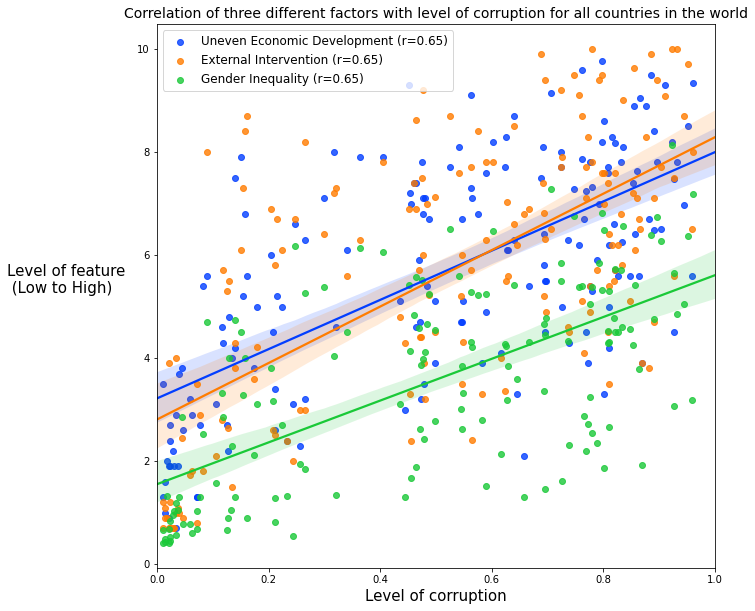

In [8]:
corruption_columns = ['aii_q10', 'aii_q14', 'aii_q35', 'bci_bci', 'bci_bcistd', 'bti_acp', 'ccp_cc', 'gcb_fcbad',
                      'gcb_fcwell', 'gcb_orcag', 'gcb_orcdis', 'gcb_pb', 'gcb_pcbsome', 'gcb_pcgomost', 'gcb_pcgosome',
                     'gcb_pcjmost', 'gcb_pcjsome', 'gcb_pclgcmost', 'gcb_pclgcsome', 'gcb_pclmost', 'gcb_pclsome',
                     'gcb_pcord', 'gcb_pcori', 'gcb_pcpmost', 'gcb_pcpolmost', 'gcb_pcpolsome', 'gcb_pcpsome',
                     'gcb_pcrmost', 'gcb_pcrsome', 'gcb_pctaxmost', 'gcb_pctaxsome', 'gcb_ped', 'gcb_pfcaag',
                     'gcb_pfcdis', 'gcb_pj', 'gcb_pmed', 'gcb_pmedia', 'gcb_pmil', 'gcb_pngo', 'gcb_poff', 'gcb_ppa',
                     'gcb_pparl', 'gcb_pper', 'gcb_ppol', 'gcb_prel', 'gcb_ptax', 'gcb_putil', 'gcb_sarcag',
                     'gcb_sarcdis', 'gir_acrl', 'ti_cpi', 'ti_cpi_max', 'ti_cpi_max_om', 'ti_cpi_min', 'ti_cpi_min_om',
                     'ti_cpi_om', 'vdem_elvotbuy', 'vdem_exbribe', 'vdem_excrptps', 'vdem_execorr', 'vdem_exembez',
                     'vdem_exthftps', 'vdem_gcrrpt', 'vdem_jucorrdc', 'vdem_mecorrpt', 'vdem_pubcorr', 'wbgi_cce',
                     'wbgi_ccn', 'wbgi_ccs', 'wdi_bribfirm', 'wdi_firgifttax', 'wdi_infpay', 'wdi_tacpsr', 'wel_coc', 
                     'wvs_jabribe']

for label in corruption_columns:
    try:
        qog_bas_cs_df.drop(labels=label, inplace=True, axis=1)
    except KeyError:
        continue

correlations = qog_bas_cs_df.corr()['vdem_corr']
large = correlations.nlargest(15)
small = correlations.nsmallest(15)
high_corr = pd.concat([large, small.iloc[::-1]])
display(high_corr)


sns.set_palette(sns.color_palette('bright'))
plt.figure(figsize = (10, 10))
sns.regplot(x=qog_bas_cs_df['vdem_corr'], y=qog_bas_cs_df['ffp_ued'], label="Uneven Economic Development (r=0.65)", truncate=False)
sns.regplot(x=qog_bas_cs_df['vdem_corr'], y=qog_bas_cs_df['ffp_ext'], label="External Intervention (r=0.65)", truncate=False)
sns.regplot(x=qog_bas_cs_df['vdem_corr'], y=qog_bas_cs_df['gii_gii']*10, label="Gender Inequality (r=0.65)", truncate=False)
plt.xlim(0, 1)
plt.xlabel('Level of corruption', size=15)
plt.ylabel('''Level of feature \n (Low to High)''', size=15, rotation=0, ha='left', labelpad=130)
plt.legend(loc="upper left", fontsize=12)
plt.title('Correlation of three different factors with level of corruption for all countries in the world', size=14)
plt.savefig('corruption_plot.png', bbox_inches='tight')

**Result:** We plot a scatterplot with vdem_corr on the x-axis and the features ffp_ued, ffp_ext, and gii_gii on the y-axis. Additionally, we plot a simple regression line with error boundaries for each feature. For all three features, strong positive correlations are clearly visible as the dots are concentrated in the lower left and the upper right quadrants, with the other two quadrants being distinctly less populated. After manually discarding all features that directly measure some form of corruption, we chose these three features because they a) correlate strongly with vdem_corr, b) are more interesting than other features as they don't measure some kind of government performance, c) all correlate positively so that the plot doesn't get too messy, and d) share the same scale (ffp_ued, ffp_ext) or can be easily scaled to that same scale (gii_gii from [0, 1] to [0, 10]).
